In [981]:
import os
import json
from dotenv import load_dotenv
import yfinance
from langchain_groq import ChatGroq

# from langchain.text_splitter import RecursiveCharacterTextSplitter
# from langchain_community.document_loaders import WebBaseLoader
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import HumanMessage, BaseMessage, AIMessage
from typing_extensions import Annotated, Literal, Sequence, TypedDict
from langgraph.graph.message import add_messages
from langchain.tools.tavily_search import TavilySearchResults
from langgraph.graph import StateGraph, START, END
from langgraph.types import Command
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()

True

In [982]:
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
# llm = ChatGroq(model_name="Gemma2-9b-It")

In [983]:
# llm.invoke("What is the current price of AAPL stock?")

In [984]:
class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]
    next: str
    content: Annotated[Sequence[BaseMessage], add_messages]

In [985]:
# class responseState(TypedDict):
#     response: Annotated[Sequence[BaseMessage], add_messages]

In [986]:
# # def get_stock_price(ticker: str) -> Command[Literal["answer_checker"]]:
# #     """
# #     Get the current stock price for a given ticker symbol.
# #     """
# #     print("--------- Stock Price -----------")

# #     # Use yfinance to get the stock price
# #     stock = yfinance.Ticker(ticker)
# #     data = stock.history(period="1d")
# #     # price = data["Close"].iloc[-1]
# #     print(data)

# #     return {"messages": data}

# #     # return state


# def get_stock_price(ticker: str) -> State:
#     """
#     Retrieve the latest closing stock price for the specified ticker symbol.
#     """
#     print("--------- Stock Price -----------")

#     try:
#         # Create a Ticker object
#         stock = yf.Ticker(ticker)

#         # Fetch historical data for the last trading day
#         data = stock.history(period="1d")

#         # Check if data is returned
#         if data.empty:
#             return {
#                 "messages": [
#                     AIMessage(content=f"No data found for ticker symbol '{ticker}'.")
#                 ]
#             }

#         # Extract the latest closing price
#         latest_close = data["Close"].iloc[-1]

#         # Format the response
#         response = (

#         return {"messages": [AIMessage(content=response)]}

#     except Exception as e:
#         # Handle exceptions and return an error message
#         error_message = (
#             f"An error occurred while retrieving data for '{ticker}': {str(e)}"
#         )
#         return {"messages": [AIMessage(content=error_message)]}


# def search_web(state: State) -> State:
#     """
#     Search the web for the latest news about a given stock ticker.
#     """
#     print("--------- Search Web -----------")

#     # Extract the user's query from the latest message
#     query = state["messages"][-1].content
#     print("User Query:", query)

#     # Initialize TavilySearchResults with desired parameters
#     tavily_search = TavilySearchResults(
#         max_results=3,
#         include_answer=True,
#         include_raw_content=True,
#         include_images=False,
#     )

#     # Perform the search
#     search_results = tavily_search.invoke({"query": query})

#     # Format the search results into a readable string
#     formatted_results = ""
#     for idx, result in enumerate(search_results["results"], start=1):
#         title = result.get("title", "No Title")
#         link = result.get("link", "No Link")
#         description = result.get("description", "No Description")
#         formatted_results += f"{idx}. {title}\n{description}\nLink: {link}\n\n"

#     # Return the formatted results as an AI message
#     return {"messages": [AIMessage(content=formatted_results)]}

In [987]:
# get_stock_price("AAPL")

In [988]:
# def serach_web(state: State) -> Command[Literal["answer_checker"]]:
#     """
#     Search the web for the latest news about a given stock ticker.
#     """
#     print("--------- Search Web -----------")

#     # Use Tavily to search for the latest news
#     query = state["messages"][-1].content
#     tavily_search = TavilySearchResults(num_results=3)
#     search_results = tavily_search.invoke(input=query)
#     # print(search_results.results[0].title)
#     # print(search_results.results[0].link)
#     # print(search_results.results[0].description)
#     # print(search_results.results[0].source)
#     # print(search_results.results[0].published_at)

#     return {"messages": search_results}

In [989]:
# serach_web({"messages": [HumanMessage(content="What is the  Capital of the france?")]})

In [990]:
# def ans_checker(state: State) -> State:
#     """
#     Validates the correctness of the user's answer using the LLM.
#     """
#     print("--------- Answer Checker -----------")
#     # Retrieve the latest message content
#     message = state["messages"][-1].content
#     print("Message from ans_checker:", message)

#     # Construct a detailed prompt for validation
#     prompt = (
#         "You are an expert AI assistant tasked with validating the following answer:\n\n"
#         f"Answer: {message}\n\n"
#         "Please assess the answer based on the following criteria:\n"
#         "- Accuracy: Is the information factually correct?\n"
#         "- Relevance: Does the answer address the question appropriately?\n"
#         "- Clarity: Is the answer clear and understandable?\n\n"
#         "Provide a brief evaluation for each criterion and conclude with an overall assessment:\n"
#         "- Correct\n"
#         "- Partially Correct\n"
#         "- Incorrect\n"
#         "- Cannot Determine\n\n"
#         "If the answer is partially correct or incorrect, please suggest improvements."
#     )

#     # Invoke the LLM with the constructed prompt
#     final_result = llm.invoke(prompt)

#     # Return the evaluation as an AI message
#     return {"messages": [AIMessage(content=final_result)]}

In [991]:
# def search_web(state: State) -> Command[Literal["answer_checker"]]:
#     query = state["messages"][-1].content
#     tavily_search = TavilySearchResults(num_results=3)
#     results = tavily_search.invoke({"input": query})
#     return {"messages": [AIMessage(content=str(results))], "next": "END"}


# def get_stock_price(state: State) -> Command[Literal["answer_checker"]]:
#     import yfinance

#     ticker = state["messages"][-1].content.split()[-1]  # crude way to extract symbol
#     stock = yfinance.Ticker(ticker)
#     data = stock.history(period="1d")
#     price = data["Close"].iloc[-1]
#     return {
#         "messages": [AIMessage(content=f"Current price of {ticker} is ${price:.2f}")],
#         "next": "END",
#     }


# def ans_checker(state: State) -> Command[Literal["ai_assistant"]]:
#     message = state["messages"][-1].content
#     result = llm.invoke(f"Is this answer correct? {message}")
#     return {"messages": [AIMessage(content=result)], "next": "END"}

In [ ]:
def get_stock_price(state: State) -> State:
    print("--- Get Stock ---")

    user_msg_main = state["messages"]
    user_msg = user_msg_main[-1].content  # get last message
    ticker = user_msg.split()[-1].upper()  # crude extraction like "GOOG"

    stock = yfinance.Ticker(ticker)
    data = stock.history(period="1d")
    print("---Data From yFinance---", data, "\n")
    try:
        price = data["Close"].iloc[-1]
        response = f"The current price of {ticker} is ${price:.2f}"
        # response=data
    except Exception:
        response = "Sorry, I couldn't fetch the stock price. Please check the ticker."

    return {
        "messages": state["messages"] + [AIMessage(content=response)],
        "next": "answer_checker",
    }


def search_web(state: State) -> State:
    print("--- Search Web ---")

    query = state["messages"][-1].content
    print("User Query:", query, "\n")
    tavily_search = TavilySearchResults(num_results=3)
    results = tavily_search.invoke(input=query)

    # response = "\n\n".join([f"{r['title']}: {r['link']}" for r in results["results"]])

    return {
        "messages": state["messages"] + [AIMessage(content=results)],
        "next": "answer_checker",
    }


def ans_checker(state: State) -> State:
    print("--- Answer Checker ---", state["messages"][-1].content, "\n")
    print("question", state["messages"][0].content, "\n")
    last_msg = state["messages"][-1].content
    question = state["messages"][0].content

    prompt = PromptTemplate(
        template="""
    You are an expert AI assistant tasked with validating the following answer:
    Here is the question asked by the user:
    Question: {question}
    Here is the answer provided by the AI:
    Answer: {last_msg}

    Please assess the answer and question based on the following criteria:
    - Accuracy: Does the answer is near or somehow relate or match to the question?
    - Relevance: Does the answer address the question appropriately?
    - Clarity: Is the answer clear and understandable?

    Provide a brief evaluation for each criterion and conclude with an overall assessment:
    - Correct
    - Partially Correct
    - Incorrect
    - Cannot Determine

    If the answer is partially correct or incorrect, please suggest improvements.
    and if the answer is correct give a brief explanation and write the answer clearly.
    """,
        input_variables=["question", "last_msg"],
    )
    chain = prompt | llm | StrOutputParser()
    result = chain.invoke(
        {
            "question": question,
            "last_msg": last_msg,
        }
    )
    # print("Prompt:", result, "\n")

    return {
        "messages": state["messages"] + [AIMessage(content=result)],
        "content": [AIMessage(content=result)],
        "next": "END",
    }

In [1089]:
tools = [ans_checker, get_stock_price, search_web]

In [1112]:
get_stock_price({"messages": [HumanMessage(content="AAPL")]})

--- Get Stock ---
---Data From yFinance---                                  Open        High         Low       Close  \
Date                                                                        
2025-04-17 00:00:00-04:00  197.199997  198.830002  194.419998  196.979996   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-04-17 00:00:00-04:00  52164700        0.0           0.0   



{'messages': [HumanMessage(content='AAPL', additional_kwargs={}, response_metadata={}),
  AIMessage(content='The current price of AAPL is $196.98', additional_kwargs={}, response_metadata={})],
 'next': 'answer_checker'}

In [1090]:
llm_with_tools = llm.bind_tools(tools)

In [1091]:
# research_agent = create_react_agent(
#     llm,
#     tools=tools,
#     prompt=make_system_prompt(
#         "You can only do research. You are working with a chart generator colleague."
#     ),
# )

In [1092]:
# res = llm_with_tools.invoke(
#     "What is the current price of Google stock? tell me the answer in one line"
# )

In [1093]:
# res

In [1094]:
# def ai_assistant(state: State) -> State:
#     print("--------- AI Assistant -----------")

#     message = state["messages"][-1].content
#     tools = "search_web, stock_price, answer_checker"

#     prompt = PromptTemplate(
#         input_variables=["question", "tools"],
#         template="""
#         You are a finance assistant.

#         - If the answer is straightforward, say "Correct" and give the answer.
#         - If not, respond ONLY with one tool name from: {tools}

#         Question: {question}
#         """,
#     )

#     chain = prompt | llm | StrOutputParser()
#     result = chain.invoke({"question": message, "tools": tools}).strip()

#     # Maintain message history + decision
#     if result in tools.split(", "):
#         print("Tool selected:", result)
#         return {
#             "messages": state["messages"] + [result],
#             "next": result,
#         }

#     return {"messages": state["messages"] + [result]}


# def ai_assistant(state: State) -> State:
#     message = state["messages"][-1].content
# response = "\n\n".join([f"{r['title']}: {r['link']}" for r in results["results"]])

#     prompt = PromptTemplate(
#         input_variables=["question", "tools"],
#         template="""
#         You are a finance assistant.

#         - If the answer is clear, say "Correct" and answer.
# response = "\n\n".join([f"{r['title']}: {r['link']}" for r in results["results"]])
#         - If not, respond ONLY with the name of a tool from: {tools}

#         Question: {question}
#         """,
#     )
#     tools = "search_web, stock_price, answer_checker"
#     chain = prompt | llm_with_tools | StrOutputParser()
#     result = chain.invoke({"question": message, "tools": tools}).strip()

#     if result in tools.split(", "):
#         return {"next": result}  # ✅ Proper update format

#     return {"messages": [AIMessage(content=result)], "next": "END"}

In [1095]:
# def ai_assistant(state: State) -> State:
#     print("--------- AI Assistant -----------")
#     print(state)

#     message = state["messages"][-1].content
#     print("Message from AI Assistant:", message)

#     tools = "search_web, stock_price, answer_checker"

#     prompt = PromptTemplate(
#         input_variables=["question", "tools"],
#         template="""
#         You are a finance assistant.

#         - If the answer is straightforward, say "Correct" and give the answer.
#         - Also provide some details to the tools if you are using them.
#         - Add those details to the message history.
#         - If not, respond ONLY with one tool name from: {tools}
#         - Enhance the message with more details according to the querys needs.

#         Question: {question}
#         """,
#     )

#     chain = prompt | llm_with_tools | StrOutputParser()
#     result = chain.invoke({"question": message, "tools": tools}).strip()

#     if result in tools.split(", "):
#         print("Tool selected:", result)
#         return {
#             "messages": state["messages"],
#             "content": result,
#             "next": result,
#         }
#     else:
#         print("Final result:", result)
#         return {
#             "messages": state["messages"],
#             "content": result,
#             "next": "END",
#         }

In [1096]:
# def ai_assistant(state: State) -> State:
#     print("--------- AI Assistant -----------")
#     print(state["messages"][-1], "\n")

#     message = state["messages"][-1].content
#     print("Message from AI Assistant:", message)

#     tools = "search_web, stock_price, answer_checker"

#     prompt = PromptTemplate(
#         input_variables=["question", "tools"],
#         template="""
#         You are a finance assistant.

#         - If the question is answerable directly, write the answer with consice and clear manner respond with the answer and write "END" in the additional_info_if needed.
#         - If it requires using tools, respond with ONLY the tool name from: {tools}
#         - If using "stock_price", also extract the ticker (like AAPL, GOOGL, MSFT).
#         - Your full response format: TOOL_NAME | additional_info_if_needed

#         Question: {question}
#         """,
#     )

#     chain = prompt | llm_with_tools | StrOutputParser()
#     result = chain.invoke({"question": message, "tools": tools}).strip()
#     # print("AI Decision:", result)
#     print("Value Getting :", result.split("|", 1)[-1].strip(), "\n\n")
#     # Handle tool responses with optional data
#     if "|" in result:
#         tool_name, extra_info = map(str.strip, result.split("|", 1))
#         print("Tool selected IF :", tool_name, "\n")
#         new_message = AIMessage(content=extra_info if extra_info else "")
#         return {
#             "messages": [new_message],
#             "content": result.split("|", 1)[-1].strip(),
#             "next": tool_name,
#         }
#     elif result.split("|", 1)[0].strip() in result:
#         print("Tool selected:", result.split("|", 1)[0].strip(), "\n")
#         return {
#             "messages": state["messages"],
#             "content": result.split("|", 1)[-1].strip(),
#             "next": result.split("|", 1)[-1].strip(),
#         }
#     else:
#         return {
#             "messages": state["messages"] + [AIMessage(content=result)],
#             "content": result.split("|", 1)[-1].strip(),
#             "next": (
#                 tool_name
#                 if "tool_name" in result.split("|", 1)[0].strip() or tool_name
#                 else "END"
#             ),
#         }

In [1097]:
def ai_assistant(state: State) -> State:
    print("--------- AI Assistant -----------")
    print(state["messages"][-1], "\n")

    message = state["messages"][-1].content
    print("Message from AI Assistant:", message)

    tools = "search_web, stock_price, answer_checker"

    prompt = PromptTemplate(
        input_variables=["question", "tools"],
        template="""
You are a finance assistant.

- If the question is answerable directly, write the answer in a concise and clear manner, and append "END" at the end.
- If it requires using tools, respond with ONLY the tool name from: {tools}
- If using "stock_price", also extract the ticker (like AAPL, GOOGL, MSFT).
- Response formats:
  - Direct answer: <answer text> END
  - Tool use: TOOL_NAME | info

Question: {question}
""",
    )

    chain = prompt | llm_with_tools | StrOutputParser()
    result = chain.invoke({"question": message, "tools": tools}).strip()
    print("AI Response:", result)

    # If answer ends with 'END', it's a direct answer
    if result.endswith("END"):
        cleaned_answer = result.rsplit("END", 1)[0].strip()
        return {
            "messages": state["messages"] + [AIMessage(content=cleaned_answer)],
            "next": "END",
        }

    # If tool format (TOOL | info)
    if "|" in result:
        tool_name, extra_info = map(str.strip, result.split("|", 1))
        print("Tool selected:", tool_name)
        return {
            "messages": state["messages"] + [AIMessage(content=extra_info)],
            "next": tool_name,
        }

    # Fallback — treat entire message as final answer
    return {
        "messages": state["messages"] + [AIMessage(content=result)],
        "next": "END",
    }

In [1098]:
state = {"messages": [HumanMessage(content="What is Rome?")]}
ai_assistant(state)

--------- AI Assistant -----------
content='What is Rome?' additional_kwargs={} response_metadata={} 

Message from AI Assistant: What is Rome?
AI Response: search_web | info
Tool selected: search_web


{'messages': [HumanMessage(content='What is Rome?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='info', additional_kwargs={}, response_metadata={})],
 'next': 'search_web'}

In [1099]:
get_stock_price(
    {
        "messages": [
            HumanMessage(
                content="What is the stock price of apple?",
                additional_kwargs={},
                response_metadata={},
            ),
            AIMessage(
                content="get_stock_price | AAPL",
                additional_kwargs={},
                response_metadata={},
            ),
        ],
        "content": "AAPL",
        "next": "END",
    }
)

--- Get Stock ---
---Data From yFinance---                                  Open        High         Low       Close  \
Date                                                                        
2025-04-17 00:00:00-04:00  197.199997  198.830002  194.419998  196.979996   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-04-17 00:00:00-04:00  51334300        0.0           0.0   



{'messages': [HumanMessage(content='What is the stock price of apple?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='get_stock_price | AAPL', additional_kwargs={}, response_metadata={}),
  AIMessage(content='The current price of AAPL is $196.98', additional_kwargs={}, response_metadata={})],
 'next': 'answer_checker'}

In [1100]:
state = State(
    messages=[
        HumanMessage(content="What is the stock price of apple?"),
        AIMessage(content="get_stock_price | AAPL"),
        AIMessage(content="The current price of AAPL is $196.98"),
    ],
    next="answer_checker",
)

ans_checker(state)

--- Answer Checker --- The current price of AAPL is $196.98 

question What is the stock price of apple? 

Prompt: Okay, I will evaluate the AI's answer based on the provided criteria.

**Evaluation:**

*   **Accuracy:** The answer appears to be accurate, assuming the price of AAPL was indeed $196.98 at the time the answer was generated. Stock prices fluctuate constantly, so without a specific timestamp, it's difficult to verify with 100% certainty, but it seems within a reasonable range.
*   **Relevance:** The answer is directly relevant to the question. It provides the stock price of Apple (AAPL), which is exactly what was asked.
*   **Clarity:** The answer is clear and concise. It's easy to understand.

**Overall Assessment:**

*   **Correct**

**Explanation:**

The answer directly and accurately addresses the question. It provides the stock price of Apple, which is what the user was looking for.

**Final Answer:**
```json
{
  "Accuracy": "Correct",
  "Relevance": "Correct",
  "Clar

{'messages': [HumanMessage(content='What is the stock price of apple?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='get_stock_price | AAPL', additional_kwargs={}, response_metadata={}),
  AIMessage(content='The current price of AAPL is $196.98', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Okay, I will evaluate the AI\'s answer based on the provided criteria.\n\n**Evaluation:**\n\n*   **Accuracy:** The answer appears to be accurate, assuming the price of AAPL was indeed $196.98 at the time the answer was generated. Stock prices fluctuate constantly, so without a specific timestamp, it\'s difficult to verify with 100% certainty, but it seems within a reasonable range.\n*   **Relevance:** The answer is directly relevant to the question. It provides the stock price of Apple (AAPL), which is exactly what was asked.\n*   **Clarity:** The answer is clear and concise. It\'s easy to understand.\n\n**Overall Assessment:**\n\n*   **Correct**\n\n**Explan

In [1101]:
def router(state: State) -> str:
    print("---- Router Thinking---")
    decide = state["next"]
    print("--- Deciding Tool ---", decide, "\n")
    return decide if decide else "END"

In [1102]:
router(
    {
        "messages": [
            AIMessage(content="AAPL", additional_kwargs={}, response_metadata={})
        ],
        "content": "AAPL",
        "next": "stock_price",
    }
)

---- Router Thinking---
--- Deciding Tool --- stock_price 



'stock_price'

In [1103]:
# workflow = StateGraph(State)

In [1104]:
graph = StateGraph(State)

graph.add_node("ai_assistant", ai_assistant)
graph.add_node("search_web", search_web)
graph.add_node("stock_price", get_stock_price)
graph.add_node("answer_checker", ans_checker)

graph.set_entry_point("ai_assistant")

graph.add_conditional_edges(
    "ai_assistant",
    router,
    {
        "search_web": "search_web",
        "stock_price": "stock_price",
        "answer_checker": "answer_checker",
        "END": END,
    },
)
graph.add_edge("search_web", "answer_checker")
graph.add_edge("stock_price", "answer_checker")
graph.add_edge("answer_checker", "ai_assistant")


app = graph.compile()


# graph = StateGraph(State)

# graph.add_node("ai_assistant", ai_assistant)
# graph.add_node("search_web", search_web)
# graph.add_node("stock_price", get_stock_price)
# graph.add_node("answer_checker", ans_checker)

# graph.set_entry_point("ai_assistant")


# graph.add_conditional_edges(
#     "ai_assistant",
#     router,
#     {
#         "search_web": "search_web",
#         "stock_price": "stock_price",
#         "answer_checker": "answer_checker",
#         "END": END,
#     },
# )

In [1105]:
app = graph.compile()

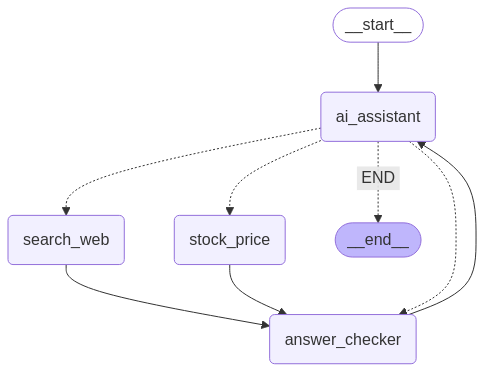

In [1106]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [1107]:
input = {
    "messages": [
        HumanMessage(content="What is the stock price of apple?"),
    ]
}
# res = app.invoke({"messages":[HumanMessage(content="What is the stock price of apple?")]})

In [1108]:
res = app.invoke(input)

--------- AI Assistant -----------
content='What is the stock price of apple?' additional_kwargs={} response_metadata={} id='ce62f6c5-45c9-4a46-b38c-72a1a5611333' 

Message from AI Assistant: What is the stock price of apple?
AI Response: stock_price | AAPL
Tool selected: stock_price
---- Router Thinking---
--- Deciding Tool --- stock_price 

--- Get Stock ---
---Data From yFinance---                                  Open        High         Low       Close  \
Date                                                                        
2025-04-17 00:00:00-04:00  197.199997  198.830002  194.419998  196.979996   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-04-17 00:00:00-04:00  51334300        0.0           0.0   

--- Answer Checker --- The current price of AAPL is $196.98 

question What is the stock price of apple? 

Prompt: Okay, I will evaluate the provided answer based on the given criteria.

**

In [1109]:
res["content"][0].content

'Okay, I will evaluate the provided answer based on the given criteria.\n\n**Evaluation:**\n\n*   **Accuracy:** The answer is likely accurate, assuming the time the answer was given. Stock prices fluctuate throughout the day.\n*   **Relevance:** The answer directly addresses the question, providing a stock price for Apple (AAPL).\n*   **Clarity:** The answer is clear and understandable. It specifies the stock ticker (AAPL) and gives a numerical price.\n\n**Overall Assessment:**\n\n*   **Correct**\n\n**Explanation:**\n\nThe answer provides a specific stock price for Apple (AAPL). Since stock prices are dynamic, the accuracy is dependent on when the answer was generated. However, assuming the price was accurate at the time, the answer is correct, relevant, and clear. To improve it, one could include a disclaimer stating the time the price was retrieved or that the price is subject to change.\n\n**Clear Answer:**\n\nThe current price of AAPL is $196.98. (Note: Stock prices are subject to 

In [1110]:
input2 = {
    "messages": [
        HumanMessage(content="What is ((2*3)*4)/2?"),
    ]
}
# res = app.invoke({"messages":[HumanMessage(content="What is the stock price of apple?")]})

In [1111]:
app.invoke(input2)

--------- AI Assistant -----------
content='What is ((2*3)*4)/2?' additional_kwargs={} response_metadata={} id='b0c97a06-1a5d-40d4-b447-fb450c8005c9' 

Message from AI Assistant: What is ((2*3)*4)/2?
AI Response: 12 END
---- Router Thinking---
--- Deciding Tool --- END 



{'messages': [HumanMessage(content='What is ((2*3)*4)/2?', additional_kwargs={}, response_metadata={}, id='b0c97a06-1a5d-40d4-b447-fb450c8005c9'),
  AIMessage(content='12', additional_kwargs={}, response_metadata={}, id='5d8f865c-7686-43c6-aba2-4c5b57a4b2a1')],
 'next': 'END',
 'content': []}